In [2]:
import pandas as pd
import math
from fuzzywuzzy import fuzz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999
pd.options.display.max_columns = 200

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import glob

import warnings
warnings.filterwarnings("ignore")



/Users/linzipeng/opt/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Data Perparation

## S&P

In [93]:
path = '/Users/linzipeng/Documents/IUE/2_Mineral_mining/data/SP/cleaned_data/'
files = ['SPGlobal_capital_cost.xlsx','SPGlobal_grade_and_contained.xlsx',
'SPGlobal_claim.xlsx','SPGlobal_loc_risk.xlsx','SPGlobal_operator_1.xlsx',
'SPGlobal_coal_details.xlsx','SPGlobal_operator_2.xlsx','SPGlobal_ore_capacity_1.xlsx',
'SPGlobal_comment.xlsx','SPGlobal_ore_capacity_2.xlsx',
'SPGlobal_commodity_capacity_1.xlsx','SPGlobal_ore_production_and_costs.xlsx',
'SPGlobal_commodity_capacity_2.xlsx','SPGlobal_ownership_info.xlsx',
'SPGlobal_production_rank.xlsx',
'SPGlobal_contractor.xlsx','SPGlobal_royalty_detail.xlsx',
'SPGlobal_cur_ownership_detail.xlsx','SPGlobal_technology_geology.xlsx',
'SPGlobal_drill_hole.xlsx','SPGlobal_tonnage_and_volume.xlsx',
'SPGlobal_drill_interval_grade.xlsx','SPGlobal_transaction_details_1.xlsx',
'SPGlobal_transaction_details_2.xlsx']
files = [path+i for i in files]

print('------------'*5, '\n Loading data')
main = pd.read_excel(path+'SPGlobal_general_info.xlsx')
for f in files:
    temp = pd.read_excel(f)
    main = pd.merge(main, temp, how='left')


------------------------------------------------------------ 
 Loading data


In [94]:
# main = main.drop(['actv_status', 'also_known_as', 'country_name', 'dev_stage', 'prop_name', 'yr_source_date'], axis=1)


In [141]:
lst = ['Librazhd-Pogradec area',
'Browns',
'Mt Goode',
'Carlingup',
'Ram',
'Bell Creek-Neck-Minnamoolka',
'Spotted Quoll - Beautiful Sunday',
'Sconi',
'Turfspruit',
'Nkamouna - Mada',
'Northmet',
'Mufulira-Nkana',
'Baluba-Muliashi',
'NICO',
'Spruce Road',
'Maturi SW',
'Nindibillup']

In [171]:
for i in lst:
    tmp = main[main['also_known_as'].fillna('').str.contains('Montufar')][['prop_id', 'prop_name', 'owner_name','country_name', 'actv_status', 'dev_stage', 'mine_type1', 'longitude', 'latitude', 'yr_source_date']]
    if tmp.shape[0]!=0:
        print(i)
        tmp


In [96]:
main[main['prop_id'].isin([24927])].T#[['prop_id', 'prop_name', 'owner_name','country_name', 'actv_status', 'dev_stage', 'mine_type1', 'longitude', 'latitude', 'yr_source_date']]

,22179
prop_name,Mesaba
prop_id,24927
prop_id.1,24927
prop_name.1,Mesaba
also_known_as,"Babbitt, Duluth Complex, MINNAMAX"
primary_commodity,Copper
dev_stage,Prefeas/Scoping
actv_status,Active
yr_source_date,2018.0
mo_source_date,2.0


## manuall_imputed

In [160]:
# nickel_mine_ma_proccessed = pd.read_excel('nickel_mine_final.xlsx')
nickel_mine_ma_proccessed = pd.read_excel('nickel_mine_ma_imputed2.xlsx')


## Heijlen

In [161]:
# df2 = pd.read_excel("/Users/linzipeng/Desktop/ScienceDirect_files_26Apr2022_08-37-31.905/1-s2.0-S0301420721002166-mmc2.xlsx",
#                     skiprows=2)


In [163]:
# df2.head()


# Data Processing

## grade

In [164]:
nickel_mine_ma_proccessed.groupby('country_name')['grade (%)'].agg([np.mean, np.median])


,mean,median
country_name,,
Albania,1.025000,1.000000
Argentina,NaN,NaN
Australia,1.350057,0.995000
Austria,NaN,NaN
Botswana,0.369000,0.325000
Brazil,1.172250,1.295000
Burkina Faso,NaN,NaN
Burundi,1.310000,1.310000
Cameroon,0.660000,0.660000


<AxesSubplot:>

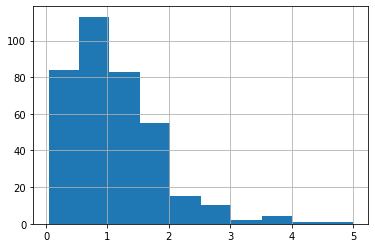

In [165]:
nickel_mine_ma_proccessed['grade (%)'].hist()


In [166]:
grade_dic = nickel_mine_ma_proccessed.groupby('country_name')['grade (%)'].median().dropna().to_dict()


In [167]:
world_median = nickel_mine_ma_proccessed['grade (%)'].median()
for i in set(nickel_mine_ma_proccessed.country_name) - set(grade_dic.keys()):
    grade_dic.update({i:world_median})

    

In [168]:
grade_dic


{'Albania': 1.0,
 'Australia': 0.995,
 'Botswana': 0.325,
 'Brazil': 1.295,
 'Burundi': 1.31,
 'Cameroon': 0.66,
 'Canada': 0.815,
 'China': 0.67,
 'Colombia': 1.2,
 "Cote d'Ivoire": 1.1165,
 'Cuba': 1.15,
 'Dominican Republic': 1.405,
 'Finland': 0.24,
 'Greece': 0.81,
 'Guatemala': 1.86,
 'Guinea': 1.28,
 'Indonesia': 1.73,
 'Kazakhstan': 0.79,
 'Madagascar': 1.27,
 'Malaysia': 0.75,
 'Myanmar': 1.455,
 'New Caledonia': 2.19,
 'North Macedonia': 1.1,
 'Norway': 0.445,
 'Papua New Guinea': 1.06,
 'Philippines': 1.3,
 'Russia': 0.7934943820224719,
 'Serbia': 0.9,
 'Solomon Islands': 1.55,
 'South Africa': 0.16999999999999998,
 'Spain': 0.6521739130434783,
 'Sweden': 1.207,
 'Tanzania': 0.815,
 'Togo': 0.99,
 'Tonga': 1.3,
 'Turkey': 0.9149999999999999,
 'USA': 0.165,
 'Venezuela': 1.48,
 'Vietnam': 2.2,
 'Zambia': 0.995,
 'Zimbabwe': 0.54,
 'Slovakia': 1.0,
 'Ukraine': 1.0,
 'Gabon': 1.0,
 'Saudi Arabia': 1.0,
 'Mexico': 1.0,
 'India': 1.0,
 'Italy': 1.0,
 'Uganda': 1.0,
 'Taiwan, Chin

In [169]:
nickel_mine_ma_proccessed.loc[nickel_mine_ma_proccessed['grade (%)'].isnull(), 'grade (%)'] =\
nickel_mine_ma_proccessed.loc[nickel_mine_ma_proccessed['grade (%)'].isnull(), 'country_name'].replace(grade_dic)


## reserve

In [71]:
nickel_mine_ma_proccessed['production_resv_ratio'] = nickel_mine_ma_proccessed['Production_PROD_Ni_tpa'] / nickel_mine_ma_proccessed['resv_metal_tonnage (mt)']


In [72]:
p_r_ratio_dic = nickel_mine_ma_proccessed.groupby('country_name')['production_resv_ratio'].median().dropna().to_dict()



In [73]:
world_median = nickel_mine_ma_proccessed['production_resv_ratio'].median()
for i in set(nickel_mine_ma_proccessed.country_name) - set(p_r_ratio_dic.keys()):
    p_r_ratio_dic.update({i:world_median})
    

In [74]:
p_r_ratio_dic


{'Australia': 0.051507596959187885,
 'Brazil': 0.02435126261805752,
 'Cameroon': 0.014990960057464234,
 'Canada': 0.07520766294993639,
 'China': 0.04106547507186458,
 'Colombia': 0.1439617117117117,
 'Cuba': 0.052792581442072495,
 'Dominican Republic': 0.032163993481430654,
 'Finland': 0.0925863121481381,
 'Greece': 0.05216572890934058,
 'Guatemala': 0.0517921146953405,
 'Indonesia': 0.04231737391304347,
 'Kazakhstan': 0.019120482177153095,
 'Madagascar': 0.030778284671532846,
 'Myanmar': 0.024285714285714285,
 'New Caledonia': 0.013601586851799376,
 'North Macedonia': 0.38296568627450983,
 'Papua New Guinea': 0.05873015873015873,
 'Philippines': 0.08192307692307692,
 'Russia': 0.18779658352546635,
 'Serbia': 0.05118595390437492,
 'South Africa': 0.022571819425444596,
 'Turkey': 0.05057590224215648,
 'USA': 0.07559869290929003,
 'Venezuela': 0.15254237288135594,
 'Zambia': 0.07300948912913549,
 'Zimbabwe': 0.03911639762107052,
 nan: 0.04231737391304347,
 'Vietnam': 0.04231737391304347,

In [75]:
impute_index = nickel_mine_ma_proccessed['resv_metal_tonnage (mt)'].isnull() & nickel_mine_ma_proccessed['resv_ore_tonnage (mt)'].notnull()
nickel_mine_ma_proccessed.loc[impute_index, 'resv_metal_tonnage (mt)'] = nickel_mine_ma_proccessed.loc[impute_index, 'resv_ore_tonnage (mt)'] * nickel_mine_ma_proccessed.loc[impute_index, 'grade (%)'] / 100 


In [76]:
impute_index = (nickel_mine_ma_proccessed['resv_metal_tonnage (mt)'].isnull()) & (nickel_mine_ma_proccessed['Production_PROD_Ni_tpa'].notnull())
nickel_mine_ma_proccessed.loc[impute_index, 'production_resv_ratio'] = nickel_mine_ma_proccessed.loc[impute_index, 'country_name'].replace(p_r_ratio_dic)
nickel_mine_ma_proccessed.loc[impute_index, 'resv_metal_tonnage (mt)'] = nickel_mine_ma_proccessed.loc[impute_index, 'Production_PROD_Ni_tpa'] / nickel_mine_ma_proccessed.loc[impute_index, 'production_resv_ratio']


In [77]:
impute_index = nickel_mine_ma_proccessed['resv_ore_tonnage (mt)'].isnull()
nickel_mine_ma_proccessed.loc[impute_index, 'resv_ore_tonnage (mt)'] = nickel_mine_ma_proccessed.loc[impute_index, 'resv_metal_tonnage (mt)'] / nickel_mine_ma_proccessed.loc[impute_index, 'grade (%)'] * 100  


## check world reserve

In [78]:
labels = ['USA', 'Australia', 'Brazil', 'Canada', 'China', 'Cuba',
       'Dominican Republic', 'Indonesia', 'New Caledonia', 'Philippines',
       'Russia']
nickel_mine_ma_proccessed.loc[:, 'country_name_new'] = nickel_mine_ma_proccessed.loc[:, 'country_name']
nickel_mine_ma_proccessed.loc[~nickel_mine_ma_proccessed['country_name'].isin(labels), 'country_name_new'] = 'others'

stat = nickel_mine_ma_proccessed.groupby('country_name_new')['resv_metal_tonnage (mt)', 'Production_PROD_Ni_tpa'].sum().astype(int)


In [79]:
stat['resv_ratio'] = (stat['resv_metal_tonnage (mt)'] / stat['resv_metal_tonnage (mt)'].sum()).map(lambda x: str(np.round(x*100, 2))+'%') 
stat['production_ratio'] = (stat['Production_PROD_Ni_tpa'] / stat['Production_PROD_Ni_tpa'].sum()).map(lambda x: str(np.round(x*100, 2))+'%')
stat


,resv_metal_tonnage (mt),Production_PROD_Ni_tpa,resv_ratio,production_ratio
country_name_new,,,,
Australia,16534226,398075,13.96%,14.57%
Brazil,10026418,115156,8.46%,4.21%
Canada,6553371,298354,5.53%,10.92%
China,4302507,117270,3.63%,4.29%
Cuba,5433203,55108,4.59%,2.02%
Dominican Republic,1025120,30000,0.87%,1.1%
Indonesia,27041267,630573,22.83%,23.08%
New Caledonia,12810012,193040,10.81%,7.07%
Philippines,6252791,102873,5.28%,3.77%


In [80]:
# usgs_stat
usgs_stat = pd.read_excel('USGS_nickel_by_country.xlsx', index_col='Unnamed: 0')
usgs_stat['Reserves_ratio'] = usgs_stat['Reserves'] / 94000000
usgs_stat


,Production_2019,Production_2020e,Production_2019_ratio,Production_2020e_ratio,Reserves,Reserves_ratio
USA,13500,16000,0.005172,0.0064,100000,0.001064
Australia,159000,170000,0.060920,0.0680,20000000,0.212766
Brazil,60600,73000,0.023218,0.0292,16000000,0.170213
Canada,181000,150000,0.069349,0.0600,2800000,0.029787
China,120000,120000,0.045977,0.0480,2800000,0.029787
Cuba,49200,49000,0.018851,0.0196,5500000,0.058511
Dominican Republic,56900,47000,0.021801,0.0188,930000,0.009894
Indonesia,853000,760000,0.326820,0.3040,21000000,0.223404
New Caledonia,208000,200000,0.079693,0.0800,12000000,0.127660
Philippines,323000,320000,0.123755,0.1280,4800000,0.051064


In [81]:
stat = pd.concat([stat, usgs_stat], axis=1).dropna()


(array([], dtype=float64), [])

Text(0.5, 1.0, 'Nickel: production share worldwide by country')

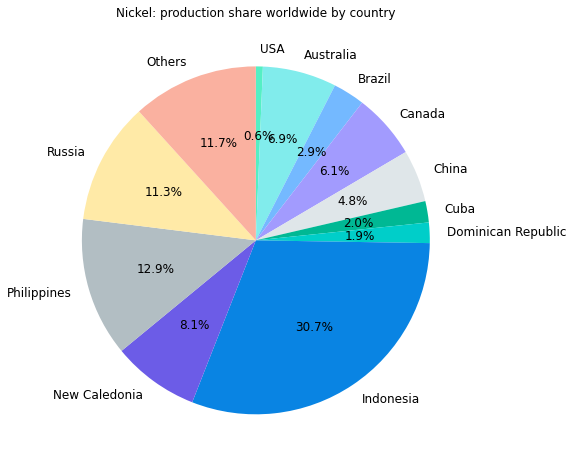

In [82]:
usgs_stat = usgs_stat.iloc[:-1]
colors = ['#55efc4','#81ecec','#74b9ff','#a29bfe','#dfe6e9','#00b894','#00cec9','#0984e3','#6c5ce7','#b2bec3','#ffeaa7','#fab1a0','#ff7675','#fd79a8','#636e72','#fdcb6e','#e17055','#d63031','#e84393','#2d3436'] 
t = plt.figure(figsize=(8, 8))
patches,l_text,p_text = plt.pie(x=usgs_stat['Production_2020e'], labels=usgs_stat.index, autopct = '%.1f%%', labeldistance=1.1,
            colors = colors, startangle = 90, counterclock = False, rotatelabels=None, textprops={'fontsize': 20})
plt.yticks(rotation=45)
plt.title('Nickel: production share worldwide by country')
for t in l_text:
    t.set_size(12)#图外的标注，如图中的华东等，可以修改字体大小
for l in p_text:
    l.set_size(12)#图内的标注，如图中的30.80%，可以修改字体大小
    

(array([], dtype=float64), [])

Text(0.5, 1.0, 'Nickel: reserve share worldwide by country')

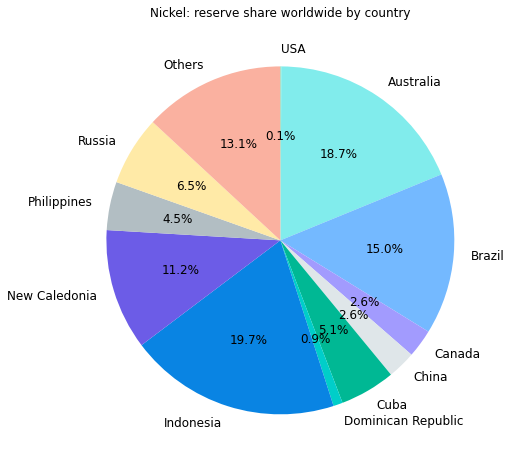

In [83]:
colors = ['#55efc4','#81ecec','#74b9ff','#a29bfe','#dfe6e9','#00b894','#00cec9','#0984e3','#6c5ce7','#b2bec3','#ffeaa7','#fab1a0','#ff7675','#fd79a8','#636e72','#fdcb6e','#e17055','#d63031','#e84393','#2d3436'] 
t = plt.figure(figsize=(8, 8))
patches,l_text,p_text = plt.pie(x=usgs_stat['Reserves'], labels=usgs_stat.index, autopct = '%.1f%%', labeldistance=1.1,
            colors = colors, startangle = 90, counterclock = False, rotatelabels=None, textprops={'fontsize': 20})
plt.yticks(rotation=45)
plt.title('Nickel: reserve share worldwide by country')
for t in l_text:
    t.set_size(12)#图外的标注，如图中的华东等，可以修改字体大小
for l in p_text:
    l.set_size(12)#图内的标注，如图中的30.80%，可以修改字体大小
    

In [84]:
stat['resv_metal_tonnage (mt)'] / stat['Reserves']


Australia             0.826711
Brazil                0.626651
Canada                2.340490
China                 1.536610
Cuba                  0.987855
Dominican Republic    1.102280
Indonesia             1.287679
New Caledonia         1.067501
Philippines           1.302665
Russia                1.027908
USA                   4.094450
dtype: float64

In [85]:
(stat['Production_PROD_Ni_tpa'] / stat['Production_2020e']).dropna()


Australia             2.341618
Brazil                1.577479
Canada                1.989027
China                 0.977250
Cuba                  1.124653
Dominican Republic    0.638298
Indonesia             0.829701
New Caledonia         0.965200
Philippines           0.321478
Russia                1.022607
USA                   1.222938
dtype: float64

In [25]:
stat['resv_metal_tonnage (mt)'].sum() / 94000000
stat['resv_metal_tonnage (mt)'].sum()
# 储量多了


1.0499975212765957

98699767.0

In [26]:
stat['Production_PROD_Ni_tpa'].sum()
stat['Production_PROD_Ni_tpa'].sum() / 2600000


2578564.0

0.9917553846153846

## other

In [27]:
nickel_mine_ma_proccessed.loc[nickel_mine_ma_proccessed['Production_PROD_Ni_tpa'].notnull(), 'dev_stage'] = 'Operating'
nickel_mine_ma_proccessed.loc[nickel_mine_ma_proccessed['Production_PROD_Ni_tpa'].notnull(), 'actv_status'] = 'Active'


# merge

In [28]:
# nickel_mine_ma_proccessed.to_excel('nickel_mine_final.xlsx', index=None)


In [56]:
nickel_mine_ma_proccessed = pd.read_excel('nickel_mine_final.xlsx')


In [57]:
main = main[main['primary_commodity']=='Nickel']
df = pd.merge(main, nickel_mine_ma_proccessed, how='outer')
df.shape


(1553, 247)

In [58]:
usgs_stat = usgs_stat.iloc[:-1]
colors = ['#55efc4','#81ecec','#74b9ff','#a29bfe','#dfe6e9','#00b894','#00cec9','#0984e3','#6c5ce7','#b2bec3','#ffeaa7','#fab1a0','#ff7675','#fd79a8','#636e72','#fdcb6e','#e17055','#d63031','#e84393','#2d3436'] 
t = plt.figure(figsize=(8, 8))
patches,l_text,p_text = plt.pie(x=usgs_stat['Production_2020e'], labels=usgs_stat.index, autopct = '%.1f%%', labeldistance=1.1,
            colors = colors, startangle = 90, counterclock = False, rotatelabels=None, textprops={'fontsize': 20})
plt.yticks(rotation=45)
plt.title('Nickel: production share worldwide by country')
for t in l_text:
    t.set_size(12)#图外的标注，如图中的华东等，可以修改字体大小
for l in p_text:
    l.set_size(12)#图内的标注，如图中的30.80%，可以修改字体大小
    

NameError: name 'usgs_stat' is not defined

In [ ]:
df['resv_metal_tonnage (mt)']

In [195]:
stat = df.groupby('owner_name')['Production_PROD_Ni_tpa'].sum().reset_index()
stat = stat[stat['Production_PROD_Ni_tpa']>0]
stat
labels = stat.sort_values(ascending=False, by='Production_PROD_Ni_tpa')['owner_name'][:10]
stat.loc[~stat['owner_name'].isin(labels), 'owner_name'] = 'others'
stat = stat.groupby('owner_name')['Production_PROD_Ni_tpa'].sum()
stat

,owner_name,production (mt)
22,Anglo American Platinum,4604.000
24,Anglo American plc,61175.000
27,Appian Capital Advisory LLP,1723.000
40,Australian Mines Ltd,11032.000
46,BHP Group,141239.000
49,BSG Resources Limited,34800.000
50,Bamangwato Concessions Ltd.,28940.000
59,Bindura Nickel Corporation Limited,8246.000
66,Blackstone Minerals Limited,4272.000
71,Boliden AB (publ),10587.000


owner_name
BHP Group                                                                      141239.000
Glencore plc                                                                   170260.000
Jinchuan Group Co., Ltd.                                                       108000.000
Nickel Asia Corporation                                                        164219.000
PT Vale Indonesia Tbk                                                           81008.000
Public Joint Stock Company Mining and Metallurgical Company Norilsk Nickel     298668.000
Sibanye Stillwater                                                             156000.000
Tsingshan Holding Group Co., Ltd.                                               80523.630
Vale S.A.                                                                      117423.000
Waterton Global Resource Management, Inc.                                       89000.000
others                                                                        1874620.788

owner_name
Anglo American Platinum                                                                                                                                            others
Anglo American plc                                                                                                                                                 others
Appian Capital Advisory LLP                                                                                                                                        others
Australian Mines Ltd                                                                                                                                               others
BHP Group                                                                                                                                                        141239.0
BSG Resources Limited                                                                                                                      

# Data exploration

## 镍矿的地域分布

以下以镍矿为例，来介绍标普矿点数据包含的信息维度

## 镍矿的地域分布

以下以镍矿为例，来介绍标普矿点数据包含的信息维度

In [31]:
import plotly.express as px
import plotly.graph_objs as go


In [85]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.density_mapbox(df.dropna(subset=['actv_status']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        zoom = 1,
                        radius = 5, 
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite" ,},
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [33]:
df.head()


,prop_id,prop_id.1,prop_name.1,primary_commodity,mo_source_date,mo_yr_source_date,mine_type1,mine_type2,mine_type3,commodities_list,amt_capital_invested,capital_cost_announced_date,capital_cost_proj_completion_date,capital_cost_completion_date,capital_cost_type,capital_cost_comments,capital_improvement_yr,grd_resv_g_per_tonne,contained_resv_oz_g_per_tonne,grd_meas_ind_g_per_tonne,contained_meas_ind_oz_g_per_tonne,grd_inf_g_per_tonne,contained_inf_oz_g_per_tonne,grd_total_resrc_g_per_tonne,contained_total_resrc_oz_g_per_tonne,grd_r_and_r_g_per_tonne,contained_r_and_r_oz_g_per_tonne,grd_meas_ind_incl_resv_g_per_tonne,contained_meas_ind_incl_resv_oz_g_per_tonne,description_claim,state_province,snl_global_region,latitude,longitude,coordinate_accuracy,distance_from,location_comments,locale,district,country/region_pol_risk,country/region_op_risk,country/region_sec_risk,country/region_ter_risk,operator_name,operator_snl_instn_key,operator_common_name,operator_company_name_abbrev,operator_date_closing_price,operator_mkt_cap,operator_price_to_ltm_eps,operator_tev,coal_uses,economic_coal_seam_count,total_coal_seam_count,transport_method_coal_details,shipping_port_coal_detail,coal_seam,coal_rank,coal_rank_abbrev,coal_group,transport_method_coal_transport,shipping_port_coal_transport,export,dom,operator_tev_to_ltm_ebitda,operator_total_debt_to_total_cap,operator_price_to_earn_after_extra,operator_tev_to_ebitda,operator_period_ended,operator_working_capital,operator_total_cap_at_bv,operator_total_debt,operator_current_liab,start_up_yr,start_up_calendar_qtr,proj_start_up_yr,proj_start_up_qtr,actual_closure_yr,actual_closure_qtr,proj_closure_yr,proj_closure_qtr,mill_capacity_tonnes_per_day,mill_capacity_tonnes_per_year,mill_capacity_cubic_m_per_day,mill_capacity_cubic_m_per_year,general_comments,full_work_history,enviro_comments,subcontractors,stripping_ratio,waste_to_ore_ratio,mining_methods,processing_methods,production_forms,mining_processing_cost_per_metric_tonne,mining_processing_cost_per_cubic_m,millhead_grade_g_per_tonne,millhead_grade_g_per_cubic_m,millhead_grade_pct,millhead_grade_ct_per_tonne,...,share_of_world_all_commodities,contractor_id,contractor_name,contractor_hq,begin_yr,begin_mo,end_yr,end_mo,proj_end_yr,proj_end_mo,contractor_last_verified,royalty_name,royalty_snl_instn_key,royalty_type,royalty_pct,royalty_holder_hq,royalty_holder_country,royalty_holder_global_region,royalty_holder_phone,royalty_holder_website,owner_name,current_owner_common_name,current_owner_company_name_abbrev,owner_type,owner_pct,current_controlling_own_pct,owner_hq,owner_city_state,owner_location,owner_frgn_province,owner_country,owner_global_region,zone_name,geology_region,geology_comments,avg_depth_geologic_dep,geologic_ore_body_type,ore_minerals,interval_id,hole_id,date_rptd,rptd_by,interval,depth,explor_purpose,significant_interval,primary_interval_commodity,interval_commodities,interval_value,r_and_r_as_of,resv_ore_tonnage,meas_ind_ore_tonnage,inf_resrc_ore_tonnage,total_resrc_ore_tonnage,r_and_r_ore_tonnage,meas_ind_ore_tonnage_incl_resv,interval_grade_g_per_tonne,grade_x_interval_g_per_tonne,interval_grade_equiv_g_per_tonne,grade_equiv_x_interval_g_per_tonne,interval_grade_pct,grade_x_interval_pct,interval_grade_equiv_pct,grade_equiv_x_interval_pct,interval_grade_ppm,grade_x_interval_ppm,interval_grade_equiv_ppm,grade_equiv_x_interval_ppm,jv,deal_pct_acquired_announcement,deal_pct_acquired_completion,total_deal_value_announcement,total_deal_value_completion,rptd_currency_code,buyer,buyer_country,seller,seller_country,buyer_name_target_name,deal_type,target,target_country,announce_date,deal_status,completion_termination_date,deal_consideration,earn_in,prop_name,also_known_as,country_name,actv_status,dev_stage,yr_source_date,resv_metal_tonnage (mt),grade (%),production (mt),resource (milion mt),resource nickel contained (milion mt),resv_ore_tonnage (mt),remark
0,87482.0,87482.0,113 North,Nickel,6.0,06/2021,NaN,NaN,NaN,"Nickel,Copper,Gold,Platinu

In [34]:
labels = df['country_name'].value_counts().index.tolist()[:9]
df.loc[:, 'country_name_new'] = df.loc[:, 'country_name']
df.loc[~df['country_name'].isin(labels), 'country_name_new'] = 'others'


## 矿点活跃状态

当前矿点活跃状态的分布

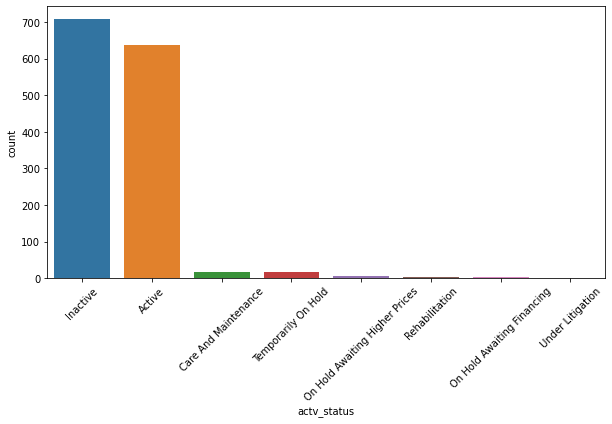

In [35]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="actv_status", data=df, order=df['actv_status'].value_counts().index)
t = plt.xticks(rotation=45)


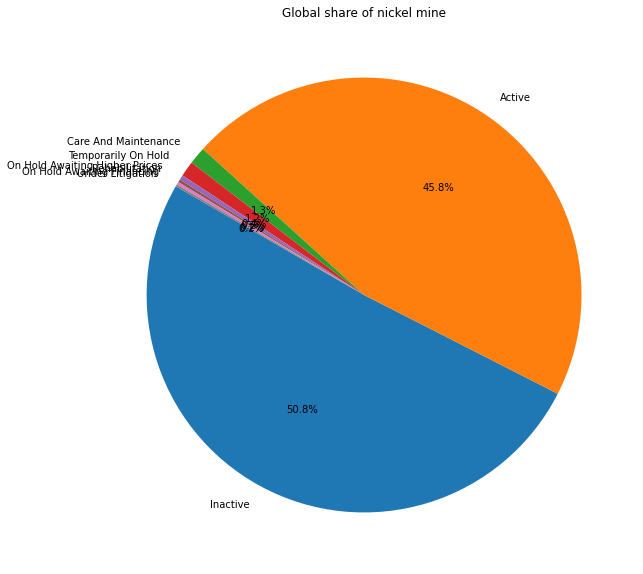

In [36]:
labels = df['actv_status'].value_counts().index.tolist()
sizes = df['actv_status'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


各阶段矿点的全球分布情况

In [138]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(df.dropna(subset=['actv_status']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'The Distribution of Nickel Mines',
                        color = 'actv_status',
                        zoom = 1,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        height=600,
                        width=1300,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [38]:
tmp = df.groupby(['country_name_new']).apply(lambda x: x['actv_status'].value_counts(normalize=True)).unstack().fillna(0).T
tmp = np.round(tmp*100, 2)
tmp.style.background_gradient()


country_name_new,Australia,Brazil,Canada,China,Finland,Indonesia,Philippines,Russia,USA,others
Active,46.040000,46.810000,36.680000,64.000000,37.930000,79.490000,44.830000,29.820000,38.460000,47.150000
Care And Maintenance,2.050000,2.130000,0.790000,0.000000,0.000000,1.280000,0.000000,3.510000,0.000000,1.520000
Inactive,50.150000,48.940000,62.010000,34.000000,58.620000,17.950000,37.930000,66.670000,61.540000,49.050000
On Hold Awaiting Financing,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760000
On Hold Awaiting Higher Prices,0.590000,2.130000,0.260000,0.000000,0.000000,0.000000,1.720000,0.000000,0.000000,0.000000
Rehabilitation,0.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380000
Temporarily On Hold,0.590000,0.000000,0.260000,1.000000,3.450000,0.000000,13.790000,0.000000,0.000000,1.140000
Under Litigation,0.000000,0.000000,0.000000,0.000000,0.000000,1.280000,1.720000,0.000000,0.000000,0.000000


In [39]:
df = df.rename(columns={'snl_global_region':'global_region'})

In [40]:
tmp = df.groupby(['global_region']).apply(lambda x: x['actv_status'].value_counts(normalize=True)).unstack().fillna(0).T
tmp = np.round(tmp*100, 2)
tmp.style.background_gradient()


global_region,Africa,Asia-Pacific,Europe,Latin America and Caribbean,Middle East,United States and Canada
Active,42.860000,52.980000,31.710000,48.100000,0.000000,35.450000
Care And Maintenance,2.380000,1.490000,1.830000,1.270000,0.000000,0.730000
Inactive,52.380000,42.380000,63.410000,49.370000,100.000000,63.330000
On Hold Awaiting Financing,0.000000,0.170000,1.220000,0.000000,0.000000,0.000000
On Hold Awaiting Higher Prices,0.000000,0.500000,0.000000,1.270000,0.000000,0.240000
Rehabilitation,0.000000,0.330000,0.610000,0.000000,0.000000,0.000000
Temporarily On Hold,2.380000,1.820000,1.220000,0.000000,0.000000,0.240000
Under Litigation,0.000000,0.330000,0.000000,0.000000,0.000000,0.000000


### 活跃镍矿点的地域分布

In [41]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.density_mapbox(df.dropna(subset=['actv_status']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        radius = 10,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


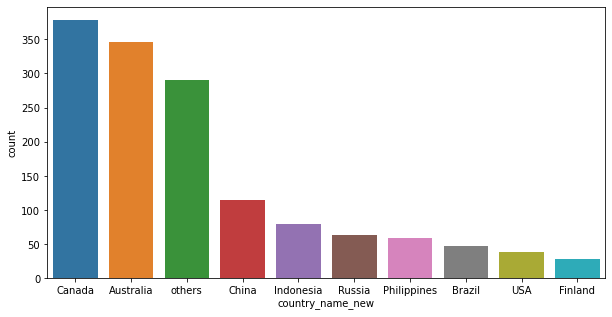

In [42]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="country_name_new", data=df, order=df['country_name_new'].value_counts().index)


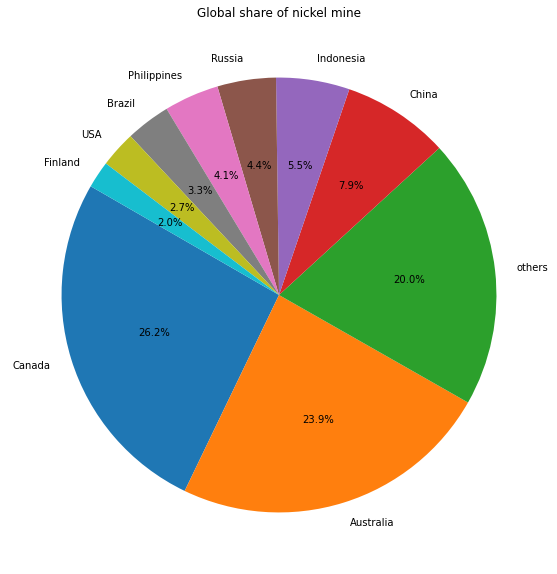

In [43]:
labels = df['country_name_new'].value_counts().index.tolist()
sizes = df['country_name_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


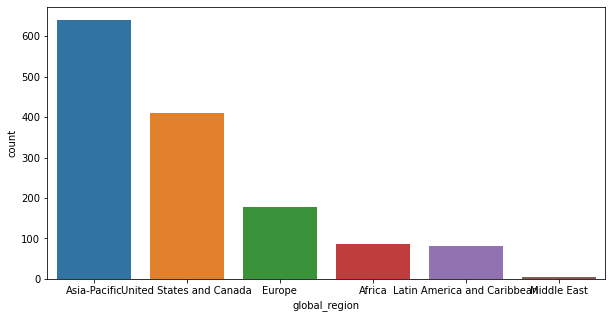

In [44]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="global_region", data=df, order=df['global_region'].value_counts().index)


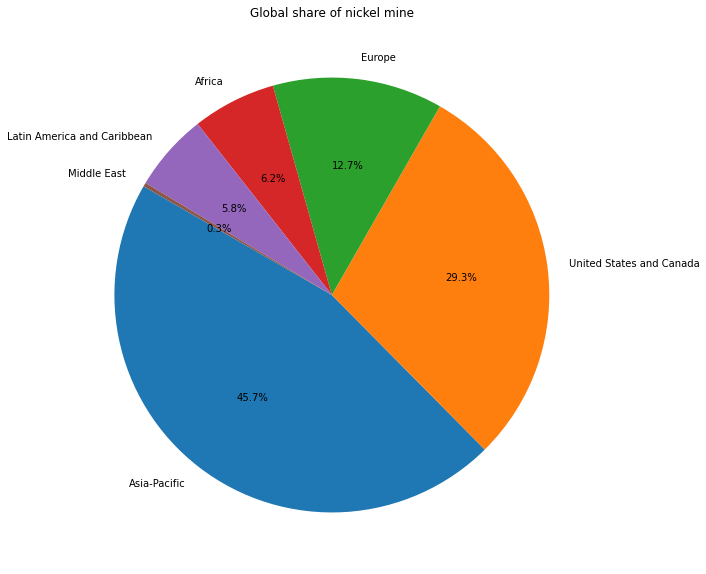

In [45]:
labels = df['global_region'].value_counts().index.tolist()
sizes = df['global_region'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


以下限定为活跃状态的矿点

In [46]:
# df = df[df['actv_status']=='Active']

## 矿点类型

In [47]:
print('空值率:', np.round(df['mine_type1'].isnull().mean(), 4))

空值率: 0.7001


In [49]:
df['is_laterite'] = df['geologic_ore_body_type'].str.contains('Laterite').astype(float)
df['is_sulfide'] = ((df['geologic_ore_body_type'].str.contains('Mafic-Ultramafic'))|(df['geologic_ore_body_type'].str.contains('Sulfide'))|\
                    (df['geologic_ore_body_type'].str.contains('Komatiitic Magmatic'))|(df['geologic_ore_body_type'].str.contains('Basalt'))).astype(float)  
df['ore_body_type'] = df.apply(lambda x: 'Laterite and Saprolite' if (x['is_laterite']==1) & (x['is_sulfide']==1)
                               else 'Laterite' if (x['is_laterite']==1)
                               else 'Sulfide' if (x['is_sulfide']==1)
                               else 'Other' if pd.notna(x['geologic_ore_body_type'])
                               else np.nan, axis=1)
df['ore_body_type'].value_counts()


Laterite                  161
Sulfide                    95
Other                      23
Laterite and Saprolite      5
Name: ore_body_type, dtype: int64

In [81]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(df.dropna(subset=['ore_body_type']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'ore_body_type',
                        zoom = 1,
                        size = df['ore_body_type'].count() * [2],
                        size_max = 10,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

In [52]:
labels = df['mine_type1'].value_counts().index.tolist()
df.loc[:, 'mine_type1_new'] = df.loc[:, 'mine_type1']
df.loc[~df['mine_type1'].isin(labels), 'mine_type1_new'] = 'others'


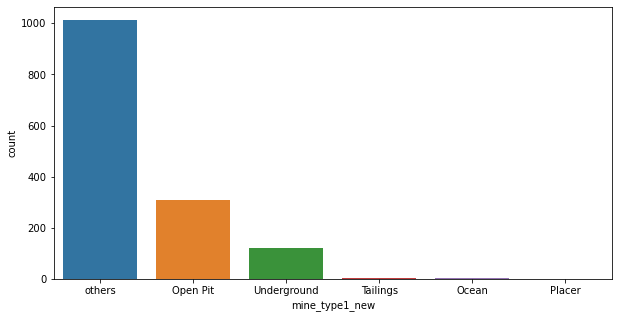

In [53]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="mine_type1_new", data=df, order=df['mine_type1_new'].value_counts().index)


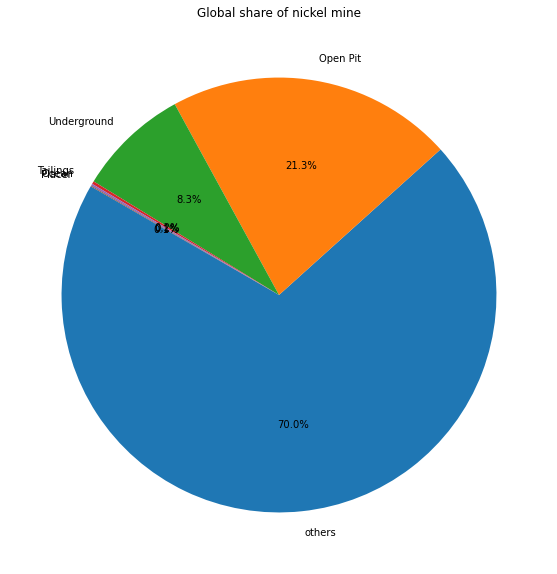

In [54]:
labels = df['mine_type1_new'].value_counts().index.tolist()
sizes = df['mine_type1_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


In [55]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.density_mapbox(df,
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        radius = 10,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [56]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(df.dropna(subset=['mine_type1']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'mine_type1',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

In [57]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(df.dropna(subset=['mine_type1']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mdistribution',
                        color = 'mine_type1',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


## 发展阶段

In [139]:
labels = df['dev_stage'].value_counts().index.tolist()[:9]
df.loc[:, 'dev_stage_new'] = df.loc[:, 'dev_stage']
df.loc[~df['dev_stage'].isin(labels), 'dev_stage_new'] = 'others'


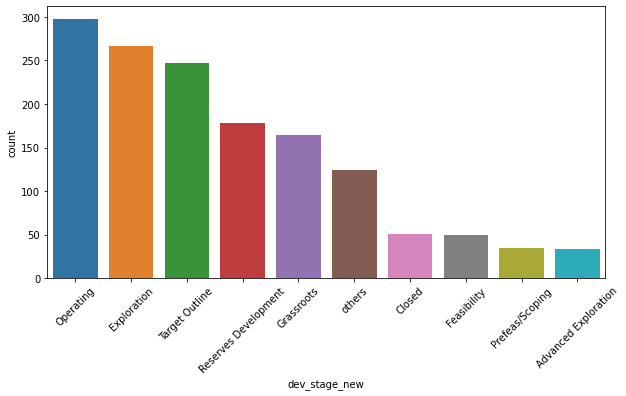

In [140]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="dev_stage_new", data=df, order=df['dev_stage_new'].value_counts().index)
t = plt.xticks(rotation=45)

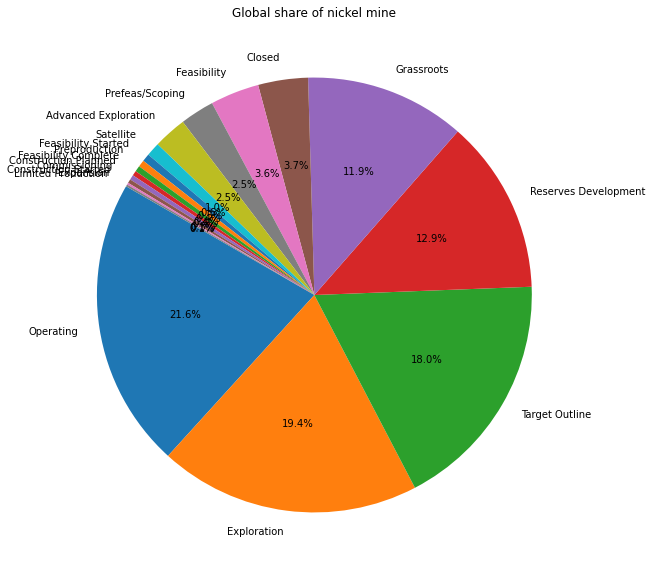

In [141]:
labels = df['dev_stage'].value_counts().index.tolist()
sizes = df['dev_stage'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


In [142]:
stage_dic = {'Grassroots':'Early-stage exploration',
'Exploration':'Early-stage exploration',
'Target Outline':'Early-stage exploration',

'Advanced Exploration':'Late-stage exploration',
'Prefeas/Scoping':'Late-stage exploration',
 
'Feasibility Started':'Feasibility-stage',
'Feasibility':'Feasibility-stage',
 
'Feasibility Complete':'Development-stage',
'Reserves Development':'Development-stage',

'Satellite':'Construction-stage',
'Construction Planned':'Construction-stage',
'Construction Started':'Construction-stage',
 
'Commissioning':'Construction-stage',
'Preproduction':'Construction-stage',

'Operating':'Operating-stage',
 
'Limited Production':'Operating-stage',
'Expansion':'Operating-stage',
'Closed':'Closed-stage'}

df['development_stage'] = df['dev_stage'].map(stage_dic)


In [198]:
df['development_stage'].unique()

array(['Early-stage exploration', 'Operating-stage',
       'Late-stage exploration', 'Closed-stage', 'Development-stage', nan,
       'Construction-stage', 'Feasibility-stage'], dtype=object)

In [146]:
stage_dic = {'Grassroots':0,
'Exploration':0,
'Target Outline':0,

'Advanced Exploration':1,
'Prefeas/Scoping':1,
 
'Feasibility Started':2,
'Feasibility':2,
 
'Feasibility Complete':3,
'Reserves Development':3,

'Satellite':4,
'Construction Planned':4,
'Construction Started':4,
 
'Commissioning':5,
'Preproduction':5,

'Operating':6,
 
'Limited Production':6,
'Expansion':6,
'Closed':7}

df['development_stage_bin'] = df['dev_stage'].map(stage_dic)


In [147]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(df.dropna(subset=['development_stage']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'development_stage_bin',
                        category_orders={'Early-stage exploration':0, 'Late-stage exploration':1, 'Feasibility-stage':2,
                                         'Development-stage':3, 'Construction-stage':4, 'Operating-stage':5, 'Closed-stage':6},
                        zoom = 1,
                        height=600,
                        width=1300,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


## 信息更新时间

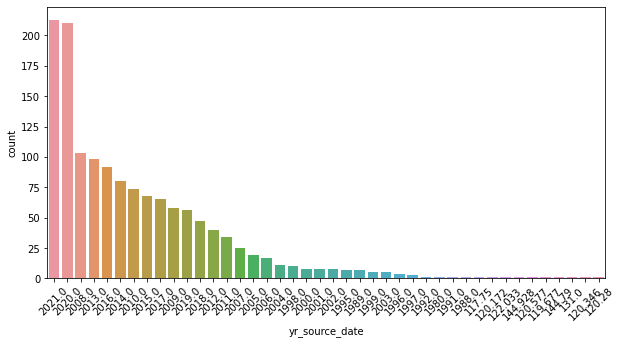

In [64]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="yr_source_date", data=df, order=df['yr_source_date'].value_counts().index)
t = plt.xticks(rotation=45)


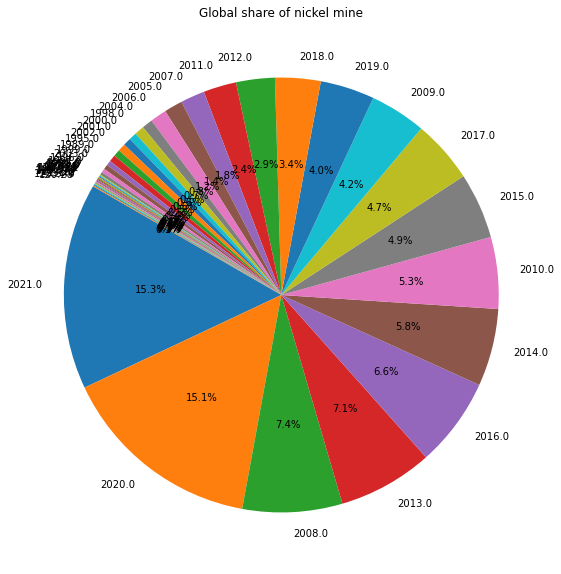

In [65]:
labels = df['yr_source_date'].value_counts().index.tolist()
sizes = df['yr_source_date'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


# 矿点所有权

In [66]:
labels = df['owner_country'].value_counts().index.tolist()[:9]
df.loc[:, 'owner_country_new'] = df.loc[:, 'owner_country']
df.loc[~df['owner_country'].isin(labels), 'owner_country_new'] = 'others'


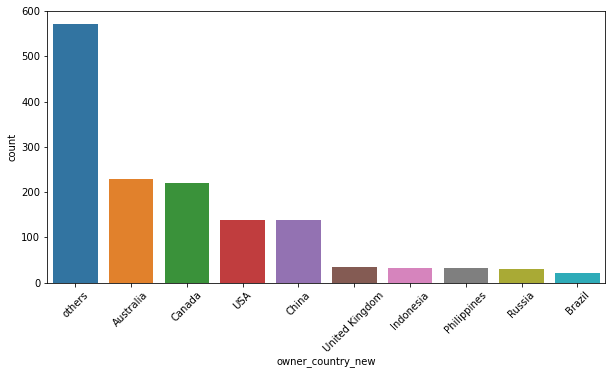

In [67]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="owner_country_new", data=df, order=df['owner_country_new'].value_counts().index)
t = plt.xticks(rotation=45)

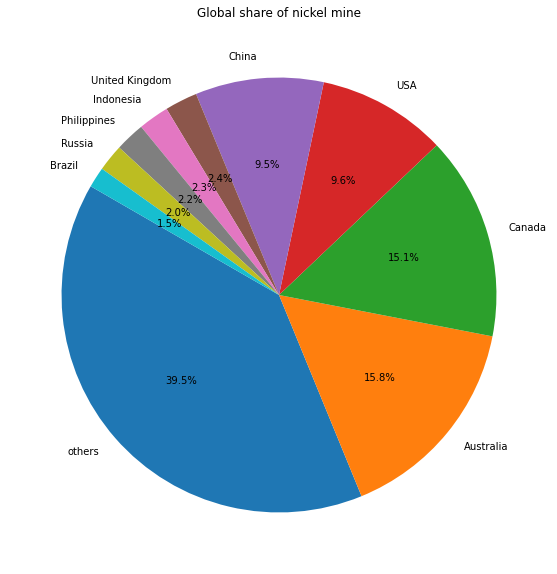

In [68]:
labels = df['owner_country_new'].value_counts().index.tolist()
sizes = df['owner_country_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


In [69]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.dropna(subset=['owner_pct', 'owner_country_new']),
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'owner_country_new',
                        title = 'nickel mine distribution',
                        zoom = 1,
                        size_max = 5,
                        size = 'owner_pct',
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [70]:
labels = df.groupby('country_name')['resv_metal_tonnage (mt)'].sum().sort_values(ascending=False).head(20).index
df.loc[:, 'country_name_new'] = df.loc[:, 'country_name']
df.loc[~df['country_name'].isin(labels), 'country_name_new'] = 'others'

df.groupby('country_name_new')['self_country_owned'].mean().map(lambda x: '%.2f'%(100*x)+'%').to_frame()

KeyError: 'Column not found: self_country_owned'

In [244]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

df['self_country_owned'] = (df['owner_country']==df['country_name']).astype(int)
fig = px.scatter_mapbox(df.dropna(subset=['owner_pct', 'owner_country_new']),
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'self_country_owned',
                        title = 'nickel mine distribution',
                        zoom = 1,
                        size_max = 5,
                        size = 'owner_pct',
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [267]:
labels = df.groupby('owner_country')['resv_metal_tonnage (mt)'].sum().sort_values(ascending=False).head(10).index
df.loc[:, 'owner_country_new'] = df.loc[:, 'owner_country']
df.loc[~df['owner_country'].isin(labels), 'owner_country_new'] = 'others'


In [273]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df[(df['self_country_owned']==0)&(df['owner_country_new']!='others')].dropna(subset=['owner_country_new']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'owner_country_new',
                        zoom = 1,
                        size = df[(df['self_country_owned']==0)&(df['owner_country_new']!='others')].dropna(subset=['owner_country_new'])['Production_PROD_Ni_tpa'].fillna(0),
                        size_max = 20,
                        height=600,
                        width=1200,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [276]:
labels = df.groupby('owner_country')['Production_PROD_Ni_tpa'].sum().sort_values(ascending=False).head(5).index
df.loc[:, 'owner_country_new'] = df.loc[:, 'owner_country']
df.loc[~df['owner_country'].isin(labels), 'owner_country_new'] = 'others'

token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df[(df['self_country_owned']==0)&(df['owner_country_new']!='others')].dropna(subset=['owner_country_new']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'owner_country_new',
                        zoom = 1,
                        size_max = 20,
                        height=600,
                        width=1200,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [ ]:
print('矿点所有者数量的分布')
df['num_royalty_owners'].hist(figsize=(10, 5))

In [ ]:
import re
from collections import Counter
def extract(x):
    if not pd.isna(x):
        x = x.replace(',', '.')
        pct_lst = re.findall(r'\d+%', str(x))
        x = re.sub(r'[\d+%]', '', re.sub(r'\(.*?\)', '', str(x)))
        x_lst = x.split(';')
        x_lst = [i.replace('.', '').lstrip(" ").rstrip(" ") for i in x_lst]
        return x_lst#, pct_lst
    else:
        return None
    

In [ ]:
df['owner_list_new'] = df['owner_list'].map(extract)
temp = []
for i in df['owner_list_new']:
    if i is not None:
        temp += i
        

In [ ]:
temp = pd.Series(Counter(temp)).sort_values(ascending=False).reset_index().head(20)
temp.columns = ['company', 'count']


In [ ]:
t = plt.figure(figsize=(10, 10))
t = sns.barplot(y='company', x='count', data=temp, orient='h')


# 资金成本

In [ ]:
print('------------'*5, '\n矿点的资金投入额的分布')
t = sns.histplot(data=df, x='amt_capital_invested')

In [ ]:
print('------------'*5, '\n矿点资金投入的地域分布')


In [ ]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df[df['amt_capital_invested'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
#                         color = 'buyer_country_new',
                        title = 'nickel mine distribution',
                        zoom = 1,
                        size = 'amt_capital_invested',
                        size_max = 30,
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

In [ ]:
print('------------'*5, '\n矿点资金投入类型的地域分布')


In [ ]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df[df['capital_cost_type'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'capital_cost_type',
                        title = 'nickel mine distribution',
                        zoom = 1,
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

# 矿石产能

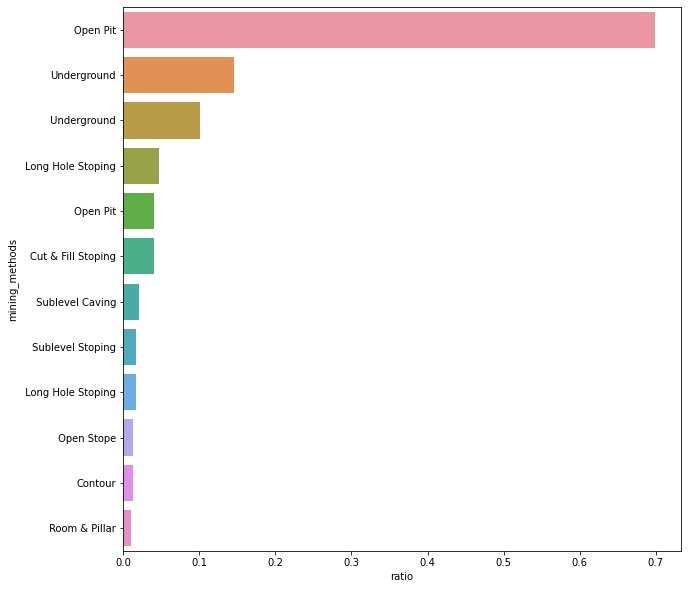

In [202]:
temp = df['mining_methods'].str.split(',', expand=True).add_prefix('mining_methods')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / df[df['mining_methods'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['mining_methods', 'ratio']
temp = temp[temp['ratio']>0.01]

t = plt.figure(figsize=(10, 10))
t = sns.barplot(data=temp, y='mining_methods', x='ratio', orient='h')


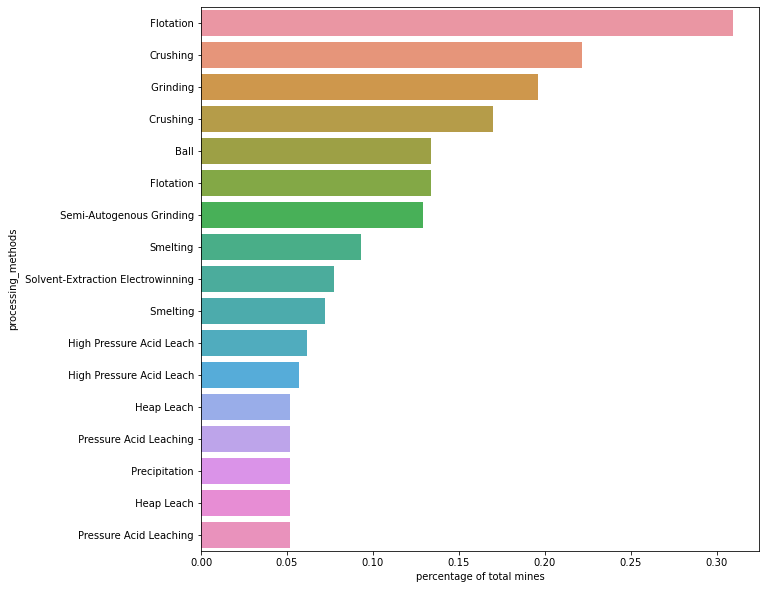

In [203]:
temp = df['processing_methods'].str.split(',', expand=True).add_prefix('processing_methods')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / df[df['processing_methods'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['processing_methods', 'percentage of total mines']
temp = temp[temp['percentage of total mines']>0.05]

t = plt.figure(figsize=(10, 10))
t = sns.barplot(data=temp, y='processing_methods', x='percentage of total mines', orient='h')

------------------------------------------------------------ 
矿点产出矿物形式的分布


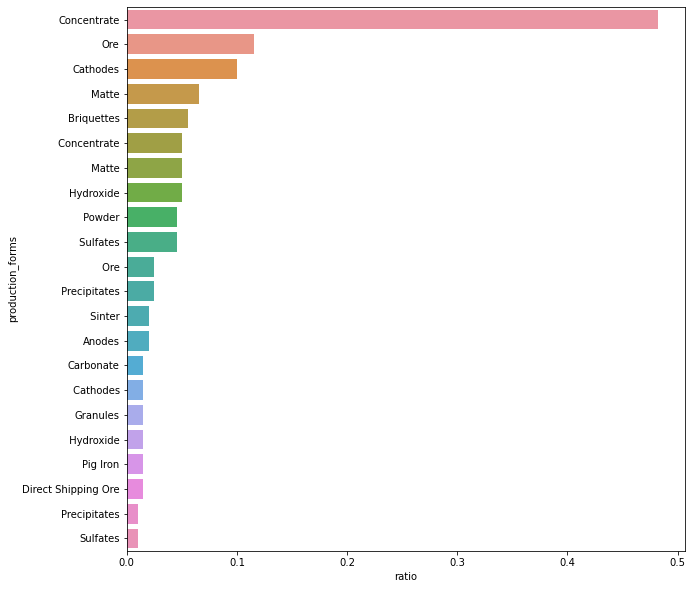

In [204]:
print('------------'*5, '\n矿点产出矿物形式的分布')

temp = df['production_forms'].str.split(',', expand=True).add_prefix('production_forms')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / df[df['production_forms'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['production_forms', 'ratio']
temp = temp[temp['ratio']>0.01]

t = plt.figure(figsize=(10, 10))
t = sns.barplot(data=temp, y='production_forms', x='ratio', orient='h')

In [205]:
temp = temp.groupby('production_forms')['ratio'].sum().sort_values(by=)

SyntaxError: invalid syntax (2607460953.py, line 1)

In [206]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.dropna(subset=['production_forms']),
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'production_forms',
                        title = 'nickel mine distribution',
                        zoom = 2,
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

In [207]:
print('------------'*5, '\n矿点日产能数额的分布')


------------------------------------------------------------ 
矿点日产能数额的分布


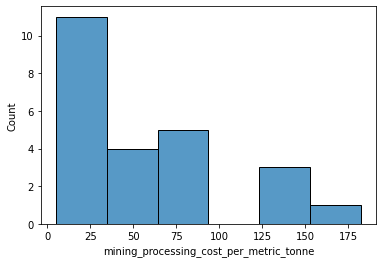

In [208]:
t = sns.histplot(df, x='mining_processing_cost_per_metric_tonne')

In [209]:
print('------------'*5, '\n矿点日产能数额的国家分布')

temp = df.groupby('country_name')['mining_processing_cost_per_metric_tonne'].mean().dropna().sort_values().to_frame()
temp.style.background_gradient()

------------------------------------------------------------ 
矿点日产能数额的国家分布


,mining_processing_cost_per_metric_tonne
country_name,
Philippines,13.140000
Cote d'Ivoire,21.240000
Russia,21.735000
Tanzania,27.330000
Canada,37.037022
Indonesia,38.890000
Brazil,61.220000
USA,86.370000
Australia,103.681187


In [210]:
print('------------'*5, '\n矿点日产能的地域分布')


------------------------------------------------------------ 
矿点日产能的地域分布


In [211]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df,
                        lon = 'longitude',
                        lat = 'latitude',
#                         color = 'actv_status',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        size = df['mill_capacity_tonnes_per_day'].fillna(0),
                        hover_data = ['mill_capacity_tonnes_per_day'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

# 矿产储量

In [212]:
print('------------'*5, '\n矿点储量地域分布的散点图')

------------------------------------------------------------ 
矿点储量地域分布的散点图


In [213]:
df['resv_metal_tonnage (mt)_bin'] = pd.qcut(df['resv_metal_tonnage (mt)'], q=5, labels=range(1, 26, 5)).astype(float)

In [216]:
labels = df.groupby('country_name')['resv_metal_tonnage (mt)'].sum().sort_values(ascending=False).head(20).index

df.loc[:, 'country_name_new'] = df.loc[:, 'country_name']
df.loc[~df['country_name'].isin(labels), 'country_name_new'] = 'others'

stat = df.groupby('country_name_new')['resv_metal_tonnage (mt)'].sum().sort_values(ascending=False)

t = plt.figure(figsize=(10, 10))
t = sns.pie(y=stat.index, x=stat.values, data=temp, orient='h')
plt.xlabel(xlabels=ax, y=range(20))

AttributeError: module 'seaborn' has no attribute 'pie'

<Figure size 720x720 with 0 Axes>

(array([], dtype=float64), [])

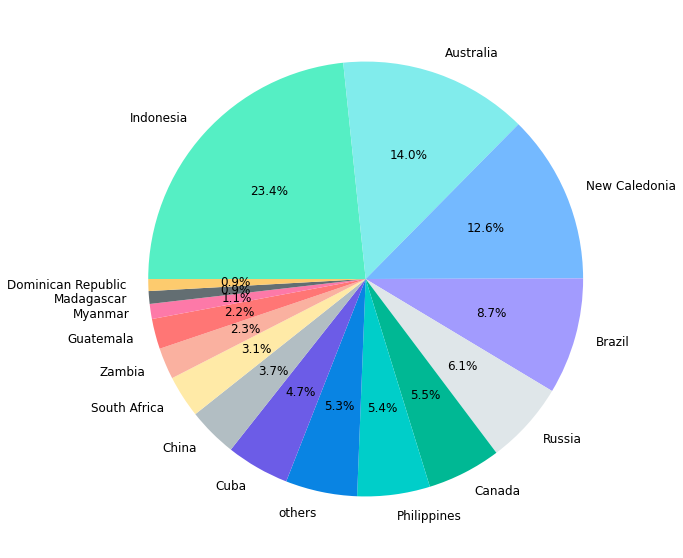

In [200]:
labels = df.groupby('country_name')['resv_metal_tonnage (mt)'].sum().sort_values(ascending=False).head(15).index

df.loc[:, 'country_name_new'] = df.loc[:, 'country_name']
df.loc[~df['country_name'].isin(labels), 'country_name_new'] = 'others'

stat = df.groupby('country_name_new')['resv_metal_tonnage (mt)'].sum().sort_values(ascending=False)

colors = ['#55efc4','#81ecec','#74b9ff','#a29bfe','#dfe6e9','#00b894','#00cec9','#0984e3','#6c5ce7','#b2bec3','#ffeaa7','#fab1a0','#ff7675','#fd79a8','#636e72','#fdcb6e','#e17055','#d63031','#e84393','#2d3436'] 
t = plt.figure(figsize=(10, 10))
patches,l_text,p_text = plt.pie(x=stat.values, labels=stat.index, autopct = '%.1f%%', labeldistance=1.1,
            colors = colors, startangle = 180, counterclock = False, rotatelabels=None)
plt.yticks(rotation=45)

for t in l_text:
    t.set_size(12)#图外的标注，如图中的华东等，可以修改字体大小
for l in p_text:
    l.set_size(12)#图内的标注，如图中的30.80%，可以修改字体大小
    

In [201]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.fillna(0),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'country_name_new',
                        size = 'resv_metal_tonnage (mt)',
                        size_max = 20,
                        zoom = 1,
                        height=600,
                        width=1200,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [233]:
df['resource nickel contained (milion mt)'].max()
df = df[df['resource nickel contained (milion mt)']!=200000000]

In [243]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.fillna(0),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
#                         color = 'country_name_new',
                        size = 'resource nickel contained (milion mt)',
                        size_max = 40,
                        zoom = 1,
                        height=600,
                        width=1000,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


# 矿产产量

In [ ]:
print('------------'*5, '\n矿点储量地域分布的散点图')

In [ ]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.dropna(subset=['Production_PROD_Ni_tpa']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'country_name_new',
                        size = 'Production_PROD_Ni_tpa',
                        zoom = 1,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [ ]:
df = df[df['resource nickel contained (milion mt)']!=2.000000e+08]

In [ ]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.dropna(subset=['resource nickel contained (milion mt)']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        size = 'resource nickel contained (milion mt)',
                        zoom = 1,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


# 矿石品位

In [221]:
# df['grade (%) bin'] = pd.qcut(df['grade (%)'], q=10, duplicates='drop', labels=range(8)).astype(float)
df['grade (%) bin'] = pd.cut(df['grade (%)'], bins=[0.07,0.5,0.6,0.7,0.8,1,1.3,1.7,5.2], labels=range(8)).astype(float)


In [223]:
for i in pd.cut(df['grade (%)'], bins=[0.07,0.5,0.6,0.7,0.8,1,1.3,1.7,5.2], retbins=True)[0].sort_values(ascending=False).unique():
    print('\n', i)


 (1.7, 5.2]

 (1.3, 1.7]

 (1.0, 1.3]

 (0.8, 1.0]

 (0.7, 0.8]

 (0.6, 0.7]

 (0.5, 0.6]

 (0.07, 0.5]

 nan


In [227]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.dropna(subset=['grade (%)']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'grade (%) bin',
                        zoom = 1,
                        size=[1]*df['grade (%)'].count(),
                        size_max=6,
                        height=600,
                        width=1200,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


200000000.0